# Reinforcement Learning Homework 1
Some assumptions before we start:
 - The cost of waiting customers is calculated after dispatched shuttle (if available)
 - Suppose we are approaching the limit of number of customers, for example we have 97 customers now and the limit is 100. Then the expceted value of cost is $\frac{V(98) + V(99) + V(100) + V(100) + V(100)}{5}$, but not $\frac{V(98) + V(99) + V(100)}{3}$.



## Problem 1


In [18]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

S_max = 200  # campacity of the station
T = 500  # maximum time periods
c_f = -100  # cost of dispatching a shuttle bus
c_h = -2 # cost of waiting customers
K = 15  # number of capacity of a shuttle bus
gamma = 0.95    # discount factor

def reward(s, a):   # reward function
    assert 0 <= s <= S_max and 0 <= a <= 1
    assert int(s) == s and int(a) == a
    return a * c_f + max(s-a*K, 0) * c_h

def generate_index_list(s, a):
    idx_list = list(range(max(s-a*K, 0)+1, max(s-a*K, 0)+6))
    for i in range(len(idx_list)):
        if idx_list[i] > S_max:
            idx_list[i] = S_max
    return idx_list

### part (a)

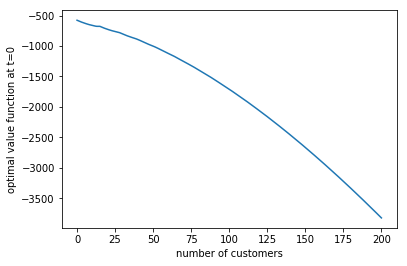

Optimal value at t=0:  [ -576.67016776  -587.44412351  -597.76728571  -607.6052606   -616.84981821
  -625.43965808  -633.62283799  -641.57340254  -648.85776002  -654.97906882
  -660.12302579  -666.16589013  -672.89216338  -676.67016776  -676.67016776
  -676.67016776  -687.44412351  -697.76728571  -707.6052606   -716.84981821
  -725.43965808  -733.62283799  -741.57340254  -748.85776002  -754.97906882
  -760.12302579  -766.16589013  -772.89216338  -780.76983102  -790.4039646
  -801.67016776  -812.44412351  -822.76728571  -832.6052606   -841.84981821
  -850.43965808  -858.62283799  -866.57340254  -874.63669603  -883.36742623
  -893.26138321  -904.05424755  -915.53052079  -927.37925241  -939.1539646
  -950.42016776  -961.19412351  -971.51728571  -981.50325844  -991.39160397
 -1001.52773174 -1012.15969956 -1023.46155203 -1035.48263774 -1048.08208003
 -1060.94224909 -1073.79882553 -1086.43631086 -1098.71987201 -1110.64502348
 -1122.35546064 -1134.03892009 -1145.90833069 -1158.16441276 -1170.

In [19]:
V = np.zeros((T+2, S_max+1))
for t in range(T, -1, -1):
    for s in range(S_max+1):
        res = [0, 0]
        for a in [0, 1]:
            idx_list = generate_index_list(s, a)
            res[a] = reward(s, a) + gamma * V[t+1, idx_list].mean()
        V[t, s] = max(res)

plt.figure()
plt.plot(V[0, :])
plt.xlabel("number of customers")
plt.ylabel("optimal value function at t=0")
plt.show()

print('Optimal value at t=0: ', V[0, :])

# part (b)

In [20]:
V = np.zeros(S_max+1)
iter_count = 0
max_iter = 500

while True:
    iter_count += 1
    V_prev = V.copy()
    for s in range(S_max+1):
        res = [0, 0]
        for a in [0, 1]:
            idx_list = generate_index_list(s, a)
            res[a] = reward(s, a) + gamma * V_prev[idx_list].mean()
        V[s] = max(res)
    if iter_count%100 == 0:
        print(iter_count, np.linalg.norm(V-V_prev) )
    if np.linalg.norm(V-V_prev) < 1e-6 or iter_count == max_iter:
        print(iter_count, np.linalg.norm(V-V_prev) )
        break

100 2.99987331203
200 0.0177608376024
300 0.000105153558154
391 9.87806802911e-07


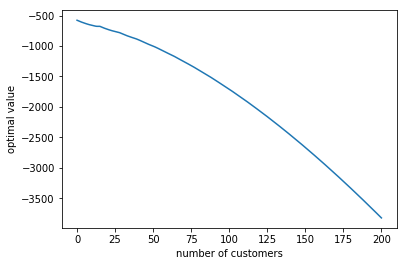

Optimal value:  [ -576.67016644  -587.44412219  -597.76728439  -607.60525928  -616.84981689
  -625.43965676  -633.62283667  -641.57340123  -648.8577587   -654.9790675
  -660.12302447  -666.16588881  -672.89216206  -676.67016644  -676.67016644
  -676.67016644  -687.44412219  -697.76728439  -707.60525928  -716.84981689
  -725.43965676  -733.62283667  -741.57340123  -748.8577587   -754.9790675
  -760.12302447  -766.16588881  -772.89216206  -780.7698297   -790.40396328
  -801.67016644  -812.44412219  -822.76728439  -832.60525928  -841.84981689
  -850.43965676  -858.62283667  -866.57340123  -874.63669472  -883.36742491
  -893.26138189  -904.05424623  -915.53051947  -927.3792511   -939.15396328
  -950.42016644  -961.19412219  -971.51728439  -981.50325712  -991.39160265
 -1001.52773042 -1012.15969824 -1023.46155071 -1035.48263642 -1048.08207871
 -1060.94224777 -1073.79882421 -1086.43630954 -1098.71987069 -1110.64502217
 -1122.35545932 -1134.03891877 -1145.90832937 -1158.16441144 -1170.9356018

In [21]:
plt.figure()
plt.plot(V)
plt.xlabel("number of customers")
plt.ylabel("optimal value")
plt.show()

print('Optimal value: ', V)

# part (c)

In [22]:
def generate_probability_matrix(policy):
    P = np.zeros((S_max+1, S_max+1))
    for s in range(S_max+1):        
        a = int(policy[s])
        idx = max(s-a*K, 0) + 1
        for i in range(5):
            P[s, min(S_max, idx+i)] += 1/5
    return P


policy = np.zeros(S_max+1)
policy[S_max-4:] = 1
iter_count = 0

while True:
    iter_count += 1
    P = generate_probability_matrix(policy)
    R = np.zeros(S_max+1)
    for s in range(S_max+1):
        R[s] = reward(s, policy[s])
    A = np.eye(S_max+1) - gamma*P
    b = np.mat(R).transpose()
    V = np.array(np.linalg.solve(A, b).transpose())[0]
    
    policy_prev = policy.copy()
    for s in range(S_max+1):
        if s > S_max-5:
            policy[s] = 1
        else:
            res = [0, 0]
            for a in [0, 1]:
                res[a] = reward(s, a) + gamma * V[max(s-a*K, 0)+1:max(s-a*K, 0)+6].mean()
            policy[s] = np.argmax(res)
    print(iter_count, np.linalg.norm(policy-policy_prev) )
    if np.linalg.norm(policy-policy_prev) < 1e-6:
        break

1 13.8924439894
2 5.09901951359
3 4.69041575982
4 2.64575131106
5 1.0
6 0.0


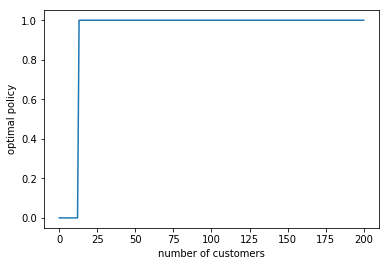

optimal policy:  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.]


In [23]:
plt.figure()
plt.plot(policy)
plt.xlabel("number of customers")
plt.ylabel("optimal policy")
plt.show()

print('optimal policy: ', policy)